In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
from  tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

In [6]:
data_sliced = pd.read_csv('../data/dataset_sliced.csv')
data_cal = pd.read_csv('../data/dataset_cal.csv')


In [7]:
X_sliced = data_sliced.iloc[:, 0:17]
y_sliced = data_sliced.iloc[:, 18]
X_cal = data_cal.iloc[:, 1:41]
y_cal = data_cal.iloc[:, 0]

In [8]:
S1_cal = data_cal.loc[data_cal['Subject'] == 'S1']
S1_cal_X = S1_cal.iloc[:, 1:41]
S1_cal_y = S1_cal.iloc[:, 0]

S1_sliced = data_sliced.loc[data_sliced['Subject'] == 'S1']
S1_sliced_X = S1_sliced.iloc[:, 0:17]
S1_sliced_y = S1_sliced.iloc[:, 18]

In [10]:
with open("../.ipynb_checkpoints/RF_sliced.pkl", "rb") as f:
   forest_sliced = pickle.load(f)

with open("../.ipynb_checkpoints/RF_cal.pkl", "rb") as f:
   forest_cal = pickle.load(f)

In [15]:
LSTM = load_model('../.ipynb_checkpoints/LSTM.hdf5')

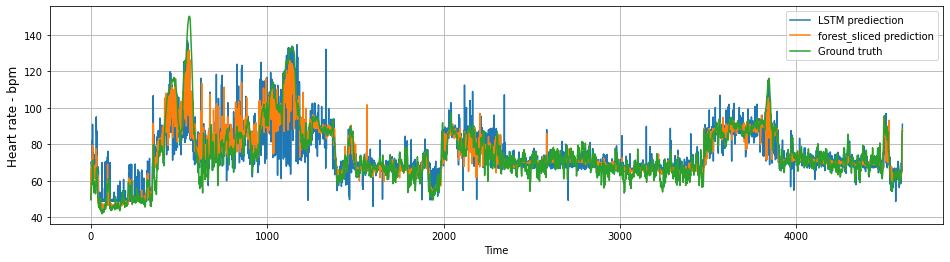

In [16]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( LSTM.predict(S1_sliced_X), label = 'LSTM prediection')
plt.plot( forest_sliced.predict(S1_sliced_X), label = 'forest_sliced prediction')
plt.plot( S1_sliced_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()

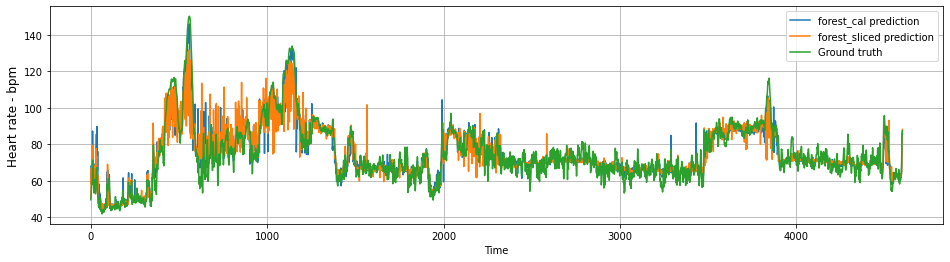

In [17]:
plt.figure(figsize=(16,4))
plt.grid(True)
plt.plot( forest_cal.predict(S1_cal_X), label = 'forest_cal prediction')
plt.plot( forest_sliced.predict(S1_sliced_X), label = 'forest_sliced prediction')
plt.plot( S1_sliced_y, label = 'Ground truth')
plt.legend()
plt.ylabel('Heart rate - bpm', fontsize=12)
plt.xlabel('Time')
plt.show()